In [1]:
!pip install gradio huggingface_hub datasets joblib torch>=1.7.0 torchvision>=0.8.1 PyYAML>=5.3.1 requests>=2.23.0 Pillow

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15602, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 15602 (delta 98), reused 115 (delta 55), pack-reused 15393
Receiving objects: 100% (15602/15602), 14.64 MiB | 15.20 MiB/s, done.
Resolving deltas: 100% (10626/10626), done.


In [3]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [4]:
import torch

import gradio as gr

from huggingface_hub import hf_hub_download

from PIL import Image

In [5]:
REPO_ID = "vcasadei/yolov5-banana-defect-detection"
FILENAME = "best.pt"

yolov5_weights = hf_hub_download(repo_id=REPO_ID, filename=FILENAME)

In [6]:
yolov5_weights

'/root/.cache/huggingface/hub/models--vcasadei--yolov5-banana-defect-detection/snapshots/2820916dac85dcb81063c86fd6e13e3699b36060/best.pt'

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=yolov5_weights, force_reload=True)  # local repo

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-29 Python-3.10.11 torch-2.0.0+cu118 CPU



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [11]:
def object_detection(im, size=640):
    print("here")
    results = model(im)  # inference
    results.print()  # print results to screen
    results.show()  # display results
    results.save()  # save as results1.jpg, results2.jpg... etc.
    results.render()  # updates results.imgs with boxes and labels
    return Image.fromarray(results.imgs[0])

In [12]:
title = "Classificação de Banana"
description = """Esse modelo é uma pequena demonstração baseada em uma análise de cerca de 60 imagens somente. Para resultados mais confiáveis e genéricos, são necessários mais exemplos (imagens).
"""

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

here


image 1/1: 640x640 2 defects
Speed: 8.3ms pre-process, 399.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


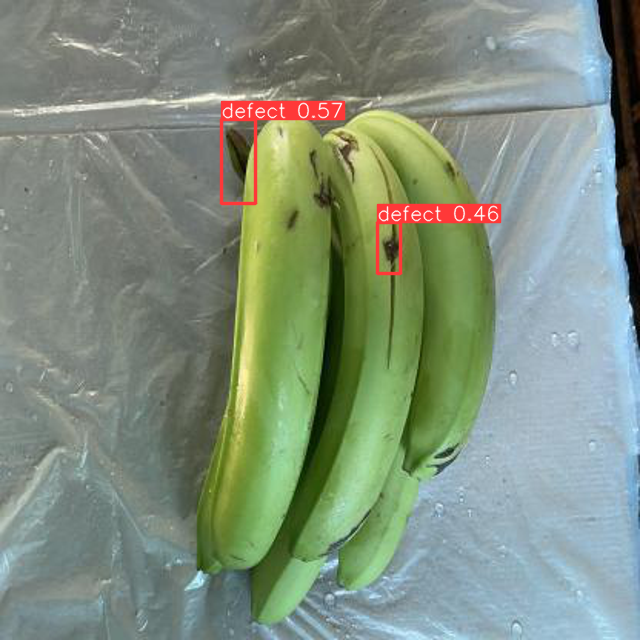

Saved 1 image to runs/detect/exp
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 399, in run_predict
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1299, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1022, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-11-b6b2c64496da>", line 8, in object_detection
    return Image.froma

Keyboard interruption in main thread... closing server.


In [13]:
image = gr.inputs.Image(shape=(640, 640), image_mode="RGB", source="upload", label="Imagem", optional=False)
outputs = gr.outputs.Image(type="pil", label="Output Image")

gr.Interface(
    fn=object_detection,
    inputs=image,
    outputs=outputs,
    title=title,
    description=description,
).launch(debug=True)